In [83]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC, LinearSVC
from sklearn.preprocessing import StandardScaler

iris = datasets.load_iris()
X = iris.data[:, [2, 3]] 
y = iris.target
class_names = iris.target_names

scaler = StandardScaler()
X = scaler.fit_transform(X)

def plot_decision_regions(X, y, model, title):
    h = .02  
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Set1)
    plt.title(title)
    plt.xlabel("Longueur du pétale (standardisée)")
    plt.ylabel("Largeur du pétale (standardisée)")
    plt.show()

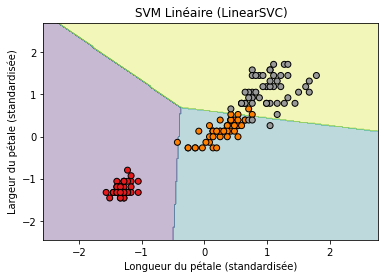

In [84]:
# SVM linéaire
svm_linear = LinearSVC(C=1.0, max_iter=10000)
svm_linear.fit(X, y)
plot_decision_regions(X, y, svm_linear, "SVM Linéaire (LinearSVC)")

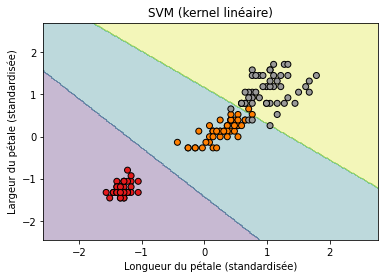

In [85]:
# SVM à noyau linéaire via SVC
svc_linear = SVC(kernel='linear', C=1.0)
svc_linear.fit(X, y)
plot_decision_regions(X, y, svc_linear, "SVM (kernel linéaire)")

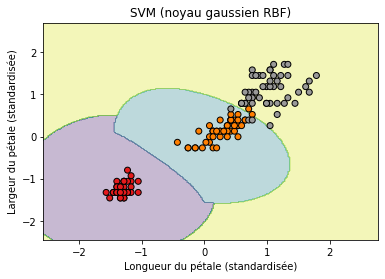

In [86]:
# SVM à noyau gaussien (RBF)
svc_rbf = SVC(kernel='rbf', gamma=0.7, C=1.0)
svc_rbf.fit(X, y)
plot_decision_regions(X, y, svc_rbf, "SVM (noyau gaussien RBF)")

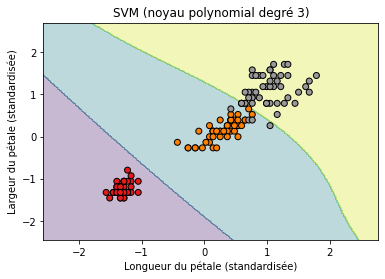

In [87]:
# SVM à noyau polynomial 
svc_poly = SVC(kernel='poly', degree=3, C=1.0)
svc_poly.fit(X, y)
plot_decision_regions(X, y, svc_poly, "SVM (noyau polynomial degré 3)")

In [88]:
X_new = np.vstack([X, [0.0, 0.0]])  
y_new = np.hstack([y, [0]])

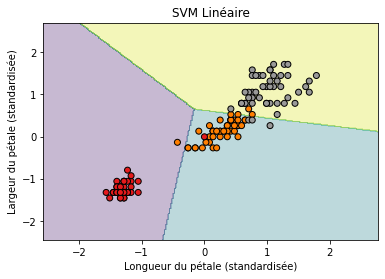

In [89]:
svm_linear_new = LinearSVC(C=1.0, max_iter=10000)
svm_linear_new.fit(X_new, y_new)
plot_decision_regions(X_new, y_new, svm_linear_new, "SVM Linéaire")

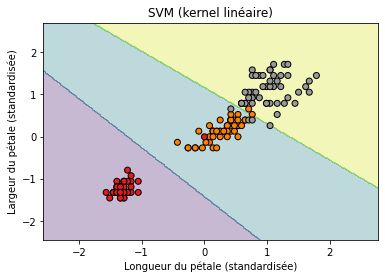

In [90]:
svc_linear_new = SVC(kernel='linear', C=1.0)
svc_linear_new.fit(X_new, y_new)
plot_decision_regions(X_new, y_new, svc_linear_new, "SVM (kernel linéaire)")

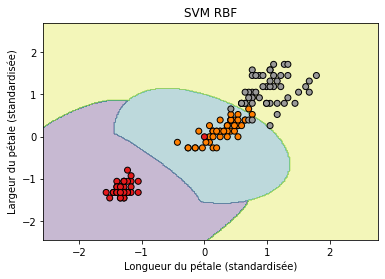

In [91]:
svc_rbf_new = SVC(kernel='rbf', gamma=0.7, C=1.0)
svc_rbf_new.fit(X_new, y_new)
plot_decision_regions(X_new, y_new, svc_rbf_new, "SVM RBF")

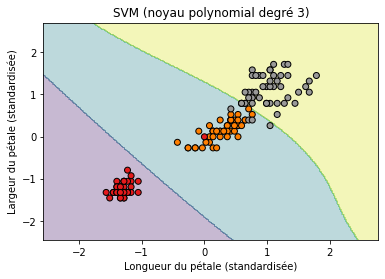

In [92]:
svc_poly_new = SVC(kernel='poly', degree=3, C=1.0)
svc_poly_new.fit(X_new, y_new)
plot_decision_regions(X_new, y_new, svc_poly_new, "SVM (noyau polynomial degré 3)")